In [1]:
import json

In [2]:
!wget https://enriched-topical-chat.s3.amazonaws.com/train.json

!wget https://enriched-topical-chat.s3.amazonaws.com/valid_freq.json

!wget https://enriched-topical-chat.s3.amazonaws.com/valid_rare.json

!wget https://enriched-topical-chat.s3.amazonaws.com/test_freq.json

!wget https://enriched-topical-chat.s3.amazonaws.com/test_rare.json

--2023-09-19 10:11:35--  https://enriched-topical-chat.s3.amazonaws.com/train.json
Resolving enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)... 52.218.246.99, 52.218.196.154, 52.218.153.27, ...
Connecting to enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)|52.218.246.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92343363 (88M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>]  88.07M  26.7MB/s    in 3.3s    

2023-09-19 10:11:38 (26.7 MB/s) - ‘train.json’ saved [92343363/92343363]

--2023-09-19 10:11:38--  https://enriched-topical-chat.s3.amazonaws.com/valid_freq.json
Resolving enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)... 52.218.246.99, 52.218.196.154, 52.218.153.27, ...
Connecting to enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)|52.218.246.99|:443... connected.
HTTP request sent, a

In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.4 MB/s eta 0:00:00


In [4]:
!pip install spacy
!python -m spacy download en_core_web_sm


2023-09-19 10:12:18.213584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 10:12:21.806100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-19 10:12:24.621264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 10:12:24.621975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [5]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.9 MB/s eta 0:00:00


In [6]:
import json

# Load the JSON data
with open('/content/train.json', 'r') as file:
    data = json.load(file)
import json

# Print a few samples
num_samples_to_print = 5  # You can change this number to print more or fewer samples

# Iterate through the keys (assuming each key represents a sample)
for i, key in enumerate(data.keys()):
    if i >= num_samples_to_print:
        break

    sample = data[key]
    print(f"Sample {i + 1} (Key: {key}):")
    print(json.dumps(sample, indent=4))  # Pretty-print the JSON data with indentation
    print("\n" + "=" * 40 + "\n")  # Separator between samples


Sample 1 (Key: t_bde29ce2-4153-4056-9eb7-f4ad710505fe):
{
    "config": "C",
    "content": [
        {
            "message": [
                "Are you a fan of Google or Microsoft?"
            ],
            "agent": "agent_1",
            "segmented_annotations": [
                {
                    "da": "<PropQ>",
                    "gt_ks": {
                        "ds": "wiki",
                        "section": "FS1",
                        "start_index": 479,
                        "end_index": 553,
                        "score": 0.16
                    }
                }
            ],
            "gt_turn_ks": {
                "ds": "wiki",
                "section": "FS1",
                "start_index": 479,
                "end_index": 553,
                "score": 0.16
            }
        },
        {
            "message": [
                "Both are excellent technology they are helpful in many ways.",
                "For the security purpose both are s

In [7]:
import json
import pandas as pd

# Load the JSON data
with open('/content/train.json', 'r') as file:
    data = json.load(file)

# Initialize empty lists to store questions and answers
questions = []
answers = []

# Iterate through the data and extract questions and answers
for key, sample in data.items():
    agent1_messages = [msg['message'][0] for msg in sample['content'] if msg['agent'] == 'agent_1']
    agent2_messages = [msg['message'][0] for msg in sample['content'] if msg['agent'] == 'agent_2']

    # Ensure that both lists have the same length
    min_length = min(len(agent1_messages), len(agent2_messages))
    agent1_messages = agent1_messages[:min_length]
    agent2_messages = agent2_messages[:min_length]

    # Append questions and answers to the respective lists
    questions.extend(agent1_messages)
    answers.extend(agent2_messages)

# Create a DataFrame
df = pd.DataFrame({'Questions': questions, 'Answers': answers})

# Print the first few rows of the DataFrame
print(df.head())


                                           Questions  \
0              Are you a fan of Google or Microsoft?   
1  I'm not  a huge fan of Google, but I use it a ...   
2                     Yeah, their services are good.   
3  Did you know Google had hundreds of live goats...   
4                              I like Google Chrome.   

                                             Answers  
0  Both are excellent technology they are helpful...  
1  Google provides online related services and pr...  
2  Google is leading the alphabet subsidiary and ...  
3                            It is very interesting.  
4  Yes.Google is the biggest search engine and Go...  


In [8]:
df

,Questions,Answers
0,Are you a fan of Google or Microsoft?,Both are excellent technology they are helpful...
1,"I'm not a huge fan of Google, but I use it a ...",Google provides online related services and pr...
2,"Yeah, their services are good.",Google is leading the alphabet subsidiary and ...
3,Did you know Google had hundreds of live goats...,It is very interesting.
4,I like Google Chrome.,Yes.Google is the biggest search engine and Go...
...,...,...
91169,I have not but that's some kind of psychologic...,"It must be, it definetely makes you think twic..."
91170,I like adult animated series like Archer and S...,That is hilarious and I love both shows I also...
91171,I can't believe there were so many.,It's like 750 Pokemon episodes and its been ar...
91172,"Wow, it does not seem like that long.","I havent seen that episode, I might google it ..."


In [9]:
print(df.describe())

       Questions Answers
count      91174   91174
unique     71808   73053
top        Yeah.   Yeah.
freq         729     725


In [ ]:
print(df.isnull().sum())

Questions    0
Answers      0
dtype: int64


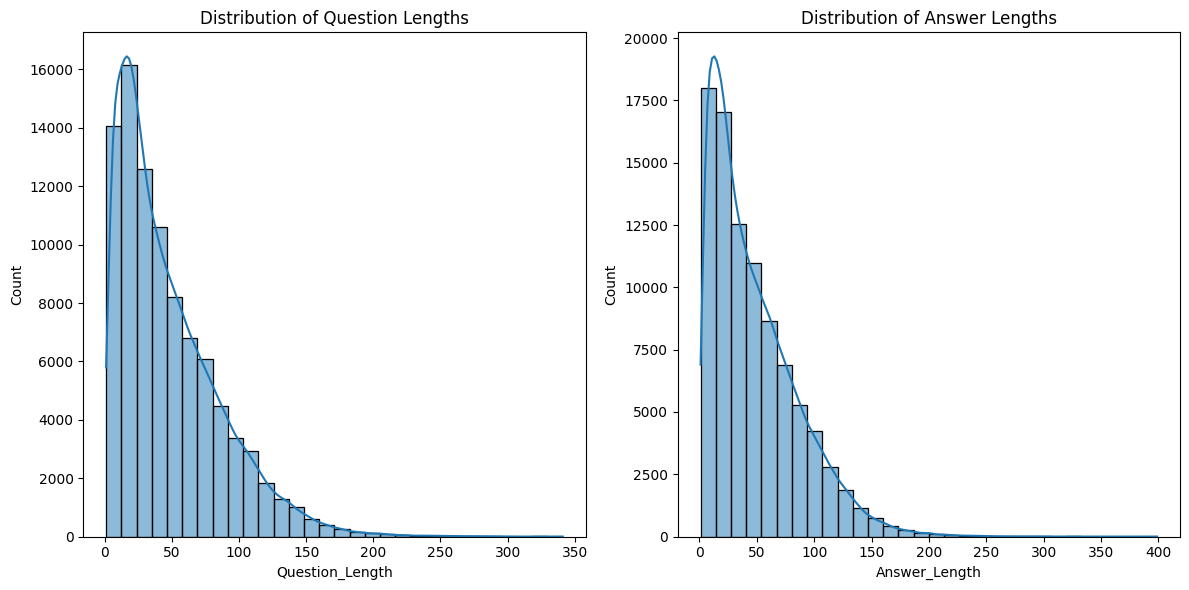

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of question and answer lengths
df['Question_Length'] = df['Questions'].apply(len)
df['Answer_Length'] = df['Answers'].apply(len)

# Distribution plots for question and answer lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Question_Length'], bins=30, kde=True)
plt.title('Distribution of Question Lengths')

plt.subplot(1, 2, 2)
sns.histplot(df['Answer_Length'], bins=30, kde=True)
plt.title('Distribution of Answer Lengths')

plt.tight_layout()
plt.show()



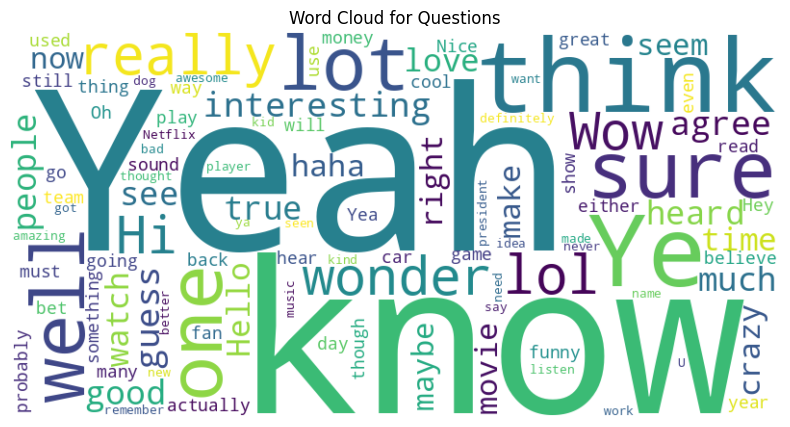

In [11]:
# Word cloud for questions and answers
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Questions']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()



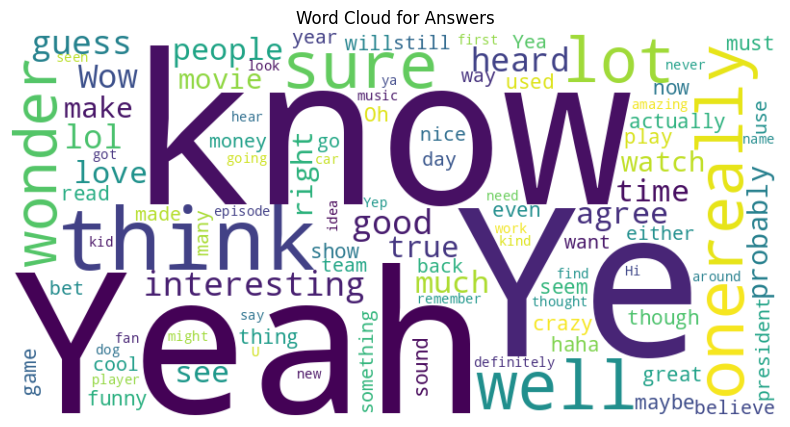

In [12]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Answers']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()


In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords



# Define a function for text preprocessing
def preprocess_text(text):


    # Tokenize the text
    tokens = text.split()


    # Join the tokens back into a text string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the preprocessing function to both "Questions" and "Answers" columns
df['Questions'] = df['Questions'].apply(preprocess_text)
df['Answers'] = df['Answers'].apply(preprocess_text)

# Print the preprocessed DataFrame
print(df.head())



                                           Questions  \
0              Are you a fan of Google or Microsoft?   
1  I'm not a huge fan of Google, but I use it a l...   
2                     Yeah, their services are good.   
3  Did you know Google had hundreds of live goats...   
4                              I like Google Chrome.   

                                             Answers  Question_Length  \
0  Both are excellent technology they are helpful...               37   
1  Google provides online related services and pr...               68   
2  Google is leading the alphabet subsidiary and ...               30   
3                            It is very interesting.               76   
4  Yes.Google is the biggest search engine and Go...               21   

   Answer_Length  
0             60  
1            115  
2            118  
3             23  
4            117  


In [14]:
df

,Questions,Answers,Question_Length,Answer_Length
0,Are you a fan of Google or Microsoft?,Both are excellent technology they are helpful...,37,60
1,"I'm not a huge fan of Google, but I use it a l...",Google provides online related services and pr...,68,115
2,"Yeah, their services are good.",Google is leading the alphabet subsidiary and ...,30,118
3,Did you know Google had hundreds of live goats...,It is very interesting.,76,23
4,I like Google Chrome.,Yes.Google is the biggest search engine and Go...,21,117
...,...,...,...,...
91169,I have not but that's some kind of psychologic...,"It must be, it definetely makes you think twic...",63,118
91170,I like adult animated series like Archer and S...,That is hilarious and I love both shows I also...,56,98
91171,I can't believe there were so many.,It's like 750 Pokemon episodes and its been ar...,35,128
91172,"Wow, it does not seem like that long.","I havent seen that episode, I might google it ...",37,97


In [15]:
# Apply the preprocessing function to both "Questions" and "Answers" columns
df['Questions'] = df['Questions'].apply(preprocess_text)
df['Answers'] = df['Answers'].apply(preprocess_text)
df

,Questions,Answers,Question_Length,Answer_Length
0,Are you a fan of Google or Microsoft?,Both are excellent technology they are helpful...,37,60
1,"I'm not a huge fan of Google, but I use it a l...",Google provides online related services and pr...,68,115
2,"Yeah, their services are good.",Google is leading the alphabet subsidiary and ...,30,118
3,Did you know Google had hundreds of live goats...,It is very interesting.,76,23
4,I like Google Chrome.,Yes.Google is the biggest search engine and Go...,21,117
...,...,...,...,...
91169,I have not but that's some kind of psychologic...,"It must be, it definetely makes you think twic...",63,118
91170,I like adult animated series like Archer and S...,That is hilarious and I love both shows I also...,56,98
91171,I can't believe there were so many.,It's like 750 Pokemon episodes and its been ar...,35,128
91172,"Wow, it does not seem like that long.","I havent seen that episode, I might google it ...",37,97


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

class ChatbotEncoder:
    def __init__(self, max_vocab_size, max_seq_length):
        self.max_vocab_size = max_vocab_size
        self.max_seq_length = max_seq_length
        self.tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")

    def fit_on_texts(self, texts):
        self.tokenizer.fit_on_texts(texts)

    def texts_to_sequences(self, texts):
        sequences = self.tokenizer.texts_to_sequences(texts)
        return pad_sequences(sequences, maxlen=self.max_seq_length, padding='post', truncating='post')

    def get_word_index(self):
        return self.tokenizer.word_index

    def get_vocab_size(self):
        return min(self.max_vocab_size, len(self.tokenizer.word_index) + 1)

# Example usage:
# Initialize the encoder with maximum vocabulary size and maximum sequence length
max_vocab_size = 10000
max_seq_length = 50
encoder = ChatbotEncoder(max_vocab_size, max_seq_length)

# Fit the encoder on your preprocessed questions and answers
encoder.fit_on_texts(df['Questions'])
encoder.fit_on_texts(df['Answers'])

# Get the word index and vocabulary size
word_index = encoder.get_word_index()
vocab_size = encoder.get_vocab_size()

# Convert questions and answers to sequences
questions_sequences = encoder.texts_to_sequences(df['Questions'])
answers_sequences = encoder.texts_to_sequences(df['Answers'])


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

class ChatbotDecoder:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def sequences_to_texts(self, sequences):
        return self.tokenizer.sequences_to_texts(sequences)

    def decode_sequence(self, sequence):
        decoded_text = self.sequences_to_texts([sequence])[0]
        return decoded_text

# Example usage:
# Initialize the decoder with the same tokenizer used for the encoder
decoder = ChatbotDecoder(encoder.tokenizer)

# Generate a sample sequence (replace with your model's generated sequence)
sample_sequence = [1, 15, 7, 2]  # Example sequence, where numbers represent word indices

# Decode the sequence into human-readable text
decoded_response = decoder.decode_sequence(sample_sequence)
print("Generated Response:", decoded_response)


Generated Response: <OOV> do is i


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

class ChatbotEncoderDecoder:
    def __init__(self, max_vocab_size, max_seq_length):
        self.max_vocab_size = max_vocab_size
        self.max_seq_length = max_seq_length
        self.encoder = self.create_encoder()
        self.decoder = self.create_decoder()

    def create_encoder(self):
        encoder = Tokenizer(num_words=self.max_vocab_size, oov_token="<OOV>")
        return encoder

    def create_decoder(self):
        return ChatbotDecoder(self.encoder)  # Pass the encoder to the decoder

    def fit_on_texts(self, questions, answers):
        self.encoder.fit_on_texts(questions)
        self.encoder.fit_on_texts(answers)

    def texts_to_sequences(self, texts, is_question=True):
        sequences = self.encoder.texts_to_sequences(texts)
        return pad_sequences(sequences, maxlen=self.max_seq_length, padding='post', truncating='post')

    def get_word_index(self):
        return self.encoder.word_index

    def get_vocab_size(self):
        return min(self.max_vocab_size, len(self.encoder.word_index) + 1)

class ChatbotDecoder:
    def __init__(self, encoder):  # Receive the encoder as a parameter
        self.encoder = encoder

    def sequences_to_texts(self, sequences):
        return self.encoder.sequences_to_texts(sequences)  # Use the encoder's method

    def decode_sequence(self, sequence):
        decoded_text = self.encoder.sequences_to_texts([sequence])[0]  # Use the encoder's method
        return decoded_text

# Example usage:
# Initialize the encoder-decoder with maximum vocabulary size and maximum sequence length
max_vocab_size = 10000
max_seq_length = 50
encoder_decoder = ChatbotEncoderDecoder(max_vocab_size, max_seq_length)

# Fit the encoder


In [19]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

class ChatbotDataset:
    def __init__(self, dataframe, max_vocab_size, max_seq_length, batch_size):
        self.dataframe = dataframe
        self.encoder_decoder = ChatbotEncoderDecoder(max_vocab_size, max_seq_length)
        self.batch_size = batch_size

    def preprocess_dataframe(self):
        # Preprocess questions and answers
        questions = self.dataframe['Questions'].tolist()
        answers = self.dataframe['Answers'].tolist()

        # Fit the encoder-decoder on questions and answers
        self.encoder_decoder.fit_on_texts(questions, answers)

        # Convert questions and answers to sequences
        questions_sequences = self.encoder_decoder.texts_to_sequences(questions, is_question=True)
        answers_sequences = self.encoder_decoder.texts_to_sequences(answers, is_question=False)

        # Split the data into training and validation sets
        train_questions, val_questions, train_answers, val_answers = train_test_split(
            questions_sequences, answers_sequences, test_size=0.2, random_state=42
        )

        # Create TensorFlow Datasets
        self.train_dataset = self.create_dataset(train_questions, train_answers)
        self.val_dataset = self.create_dataset(val_questions, val_answers)

    def create_dataset(self, questions, answers):
        dataset = tf.data.Dataset.from_tensor_slices((questions, answers))
        dataset = dataset.shuffle(len(questions))
        dataset = dataset.batch(self.batch_size)
        return dataset

    def get_train_dataset(self):
        return self.train_dataset

    def get_val_dataset(self):
        return self.val_dataset

# Example usage:
# Load your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Initialize the dataset with maximum vocabulary size, maximum sequence length, and batch size
max_vocab_size = 10000
max_seq_length = 50
batch_size = 64
chatbot_data = ChatbotDataset(df, max_vocab_size, max_seq_length, batch_size)

# Preprocess the DataFrame and create training and validation datasets
chatbot_data.preprocess_dataframe()

# Get the training and validation datasets
train_dataset = chatbot_data.get_train_dataset()
val_dataset = chatbot_data.get_val_dataset()

# Iterate through batches in the training dataset
for batch in train_dataset:
    questions, answers = batch
    # Your training logic here


In [20]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the JSON data from the file
json_file_path = '//content/train.json'  # Replace with the actual file path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert the JSON data into a DataFrame
df = pd.DataFrame(data)

# If you have a very small dataset, consider using a larger portion for training
# Adjust test_size as needed, but ensure it's less than 1.0
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Now, you have train_df and test_df for your training and test sets


In [21]:
!pip install torch pandas


In [22]:
import json
import pandas as pd

# Load the JSON data from the file
json_file_path = '/content/train.json'  # Replace with the actual file path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Convert the JSON data into a DataFrame
df = pd.DataFrame(data)


In [23]:
from torch.utils.data import Dataset

class ChatbotDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Implement logic to return a single data sample
        # For example, return a tuple containing input and target tensors
        # Make sure to preprocess the data appropriately
        sample = {
            'input': input_tensor,
            'target': target_tensor
        }
        return sample


In [24]:
chatbot_dataset = ChatbotDataset(df)


In [25]:
from torch.utils.data import DataLoader

batch_size = 32  # Adjust the batch size as needed
train_dataloader = DataLoader(chatbot_dataset, batch_size=batch_size, shuffle=True)


In [26]:
from torch.utils.data.dataset import random_split

# Define the sizes for train, validation, and test sets
train_size = int(0.8 * len(chatbot_dataset))
val_size = int(0.1 * len(chatbot_dataset))
test_size = len(chatbot_dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(chatbot_dataset, [train_size, val_size, test_size])


In [27]:
# Create data loaders for each set
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
print(train_dataloader)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# You can now use train_dataloader, val_dataloader, and test_dataloader for training, validation, and testing.


In [28]:
from torch.utils.data.dataset import random_split
from torch.utils.data import DataLoader

# Define the sizes for train, validation, and test sets
train_size = int(0.8 * len(chatbot_dataset))
val_size = int(0.1 * len(chatbot_dataset))
test_size = len(chatbot_dataset) - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(chatbot_dataset, [train_size, val_size, test_size])

# Define batch size
batch_size = 32  # You can adjust the batch size as needed

# Create data loaders for each set
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# You can now use train_dataloader, val_dataloader, and test_dataloader for training, validation, and testing.
print(train_dataloader)


In [29]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"  # Choose the model name that suits your task
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)


In [30]:

import torch
from torch.utils.data import DataLoader, Dataset
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW, get_linear_schedule_with_warmup

# Define your dataset class (you may need to modify this to match your data format)
class ChatbotDataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length=128):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        input_text = self.questions[idx]
        target_text = self.answers[idx]

        inputs = self.tokenizer.encode(input_text, truncation=True, max_length=self.max_length, padding='max_length')
        targets = self.tokenizer.encode(target_text, truncation=True, max_length=self.max_length, padding='max_length')

        return {
            'input_ids': torch.tensor(inputs, dtype=torch.long),
            'attention_mask': torch.tensor([1] * len(inputs), dtype=torch.long),
            'labels': torch.tensor(targets, dtype=torch.long),
        }

# Define your training data and tokenizer
train_questions = ["Are you a fan of Google or Microsoft?"]  # List of training questions
train_answers = ["Both are excellent technology they are helpful."]    # List of corresponding answers
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', pad_token='<pad>')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [31]:

# Create the dataset and dataloader
batch_size = 8  # Adjust as needed
dataset = ChatbotDataset(train_questions, train_answers, tokenizer)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [32]:
# Load the pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2')


In [33]:
from transformers import AdamW, get_linear_schedule_with_warmup
import torch

# Define the number of training epochs
num_epochs = 3  # Adjust as needed

# Set up training configurations
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader) * num_epochs)

# Now, you can use the 'num_epochs' variable in your training loop
# for epoch in range(num_epochs):
#     # Your training loop code here

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [34]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
print(train_dataloader)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
# Define your DataLoader (train_dataloader in this example)
# Adjust batch size, number of epochs, etc., as needed
batch_size = 32
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0

    # Print the average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Loss: {avg_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), 'your_model.pth')


Epoch [1/10] - Loss: 0.0000
Epoch [2/10] - Loss: 0.0000
Epoch [3/10] - Loss: 0.0000
Epoch [4/10] - Loss: 0.0000
Epoch [5/10] - Loss: 0.0000
Epoch [6/10] - Loss: 0.0000
Epoch [7/10] - Loss: 0.0000
Epoch [8/10] - Loss: 0.0000
Epoch [9/10] - Loss: 0.0000
Epoch [10/10] - Loss: 0.0000


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2"  # You can specify other GPT-2 variants
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Function to generate a response
def generate_response(prompt_text, max_length=50):
    input_ids = tokenizer.encode(prompt_text, return_tensors="pt")
    attention_mask = torch.ones(input_ids.shape, dtype=input_ids.dtype)
    with torch.no_grad():
        output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=50256, max_length=max_length, num_return_sequences=1)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Example usage:
prompt = "Are you a fan of Google or Microsoft?"
response = generate_response(prompt)
print("Generated Response:", response)


Generated Response: Are you a fan of Google or Microsoft?

I'm a fan of Google or Microsoft. I'm a fan of Google. I'm a fan of Google. I'm a fan of Google. I'm a fan of Google. I'm


In [35]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

# Download the 'punkt' tokenizer models
nltk.download('punkt')

# Reference sentences (ground truth)
reference = ["I'm a fan of Google or Microsoft."]
# Generated response
generated_response = "I'm a fan of Google or Microsoft."

# Tokenize reference and generated sentences
reference_tokens = [nltk.word_tokenize(ref.lower()) for ref in reference]
generated_tokens = nltk.word_tokenize(generated_response.lower())

# Calculate BLEU score for a single sentence
bleu_score = sentence_bleu(reference_tokens, generated_tokens)

print("BLEU Score (Sentence):", bleu_score)

# Calculate BLEU score for a corpus (multiple sentences)
corpus_bleu_score = corpus_bleu(reference_tokens, [generated_tokens])

print("BLEU Score (Corpus):", corpus_bleu_score)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


BLEU Score (Sentence): 1.0
BLEU Score (Corpus): 1.384292958842266e-231


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [36]:
import torch

def generate_response(user_input, max_length=50):
    # Tokenize the user's input
    input_ids = tokenizer.encode(user_input, return_tensors='pt')

    # Generate a response
    with torch.no_grad():
        response_ids = model.generate(input_ids, max_length=max_length, num_return_sequences=1)

    # Decode the response
    generated_response = tokenizer.decode(response_ids[0], skip_special_tokens=True)

    return generated_response


In [38]:
def generate_response(prompt_text, max_length=50):
    input_ids = tokenizer.encode(prompt_text, return_tensors="pt")
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)

    with torch.no_grad():
        output = model.generate(input_ids, attention_mask=attention_mask, pad_token_id=tokenizer.eos_token_id, max_length=max_length, num_return_sequences=1)

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

In [39]:
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    response = generate_response(user_input)
    print("Chatbot:", response)


You: what is your name?
Chatbot: what is your name?

I'm a little bit of a mystery. I'm not sure if I'm a real person or not. I'm just a guy who's been around the block for a while. I'm a guy who's
You: exit
